# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# check the shape of the data
df.shape

(1898, 9)

#### Observations: 

There are 1898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. order_id, customer_id, food_preparation_time and delivery_time columns are of integer data types
2. cost_of_the_order column is of float data type
3. restaurant_name, cuisine_type, day_of_the_week and rating columns are of string data types
4. current memory usage is 133.6 KB

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' and 'rating' into categorical data
df['restaurant_name'] = df['restaurant_name'].astype('category')
df['cuisine_type'] = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')
df['rating'] = df['rating'].astype('category')
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(4), float64(1), int64(4)
memory usage: 90.9 KB


#### Observations:

The four 'objects' have been converted to 'category' and the memory usage has been reduced from 133.6 KB to 90.9 KB


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# check the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
1. minimum time it for food to be prepared once an order is placed is 20.000000
2. average time it for food to be prepared once an order is placed is 27.371970
3. maximum time it for food to be prepared once an order is placed is 35.000000

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Check value counts of ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

There are 736 orders that are not rated


### Check for missing values

In [8]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
There are no missing values in any of the columns

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Boxplot of cost_of_the_order 

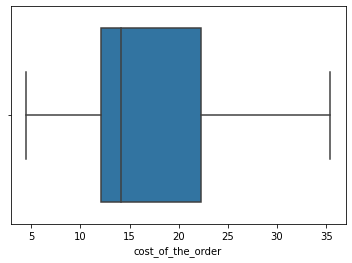

In [9]:
# check distribution of cost using boxplot 
sns.boxplot(data = df, x='cost_of_the_order')
plt.show()

#### Observations:
The box plot shows that the distribution of the cost_of_the_order is right skewed, no outliers with the median cost around 14 dollars and 75 percent of the orders cost below 22 dollars

### Histogram of cost_of_order

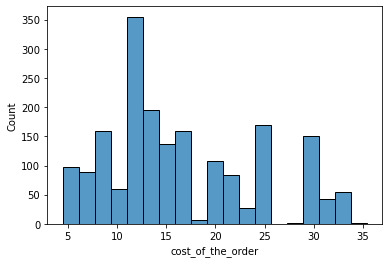

In [10]:
# check distribution of cost using histplot 
sns.histplot(df['cost_of_the_order'])
plt.show()

#### Observations:
The histogram plot further confirms that the distribution of the cost_of_the_order is right skewed and also show that the distribution is unimodal with the most frequent cost_of_the_order between 11 and 12 dollars

### Boxplot of food_preparation_time 

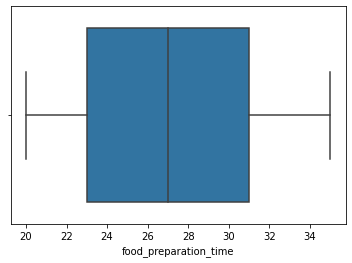

In [11]:
# check distribution of food preparation time using boxplot 
sns.boxplot(data = df, x='food_preparation_time')
plt.show()

#### Observations:
The box plot shows that the distribution of the food_preparation_time is normal, no outliers with the median  preparation time of about 27 minutes and 75 percent of the orders take below 31 minutes to prepare.

### Histogram of food_preparation_time

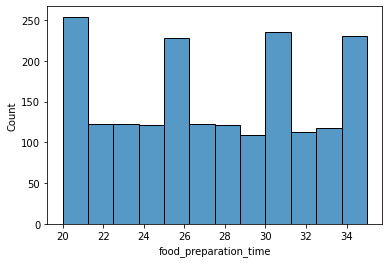

In [12]:
# check distribution of food preparation time using histplot
sns.histplot(df['food_preparation_time'])
plt.show()

### Boxplot of delivery_time 

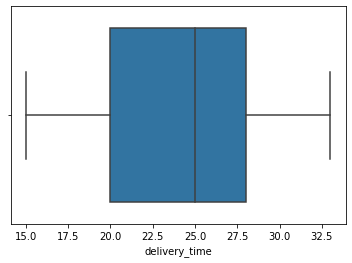

In [13]:
# check distribution of delivery time using boxplot
sns.boxplot(data = df, x='delivery_time')
plt.show()

#### Observations:
The box plot shows that the distribution of the delivery_time is sighlty skewed to the left, no outliers with the median delivery time of about 25 minutes and 75 percent of the orders take below 28 minutes to deliver.

### Histogram of delivery_time

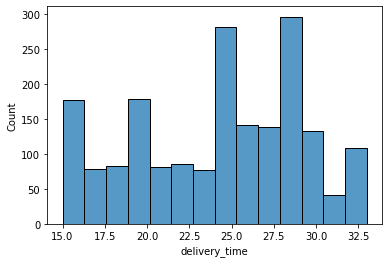

In [14]:
# check distribution of delivery time using histplot
sns.histplot(df['delivery_time'])
plt.show()

In [15]:
# check the number of distinct restaurants in the data
df.restaurant_name.nunique()

178

In [16]:
# check the number of distinct cuisine types in the data
df.cuisine_type.nunique()

14

In [17]:
# check the number of distinct customers in the data
df.customer_id.nunique()

1200

### Count plot of cuisine_type 

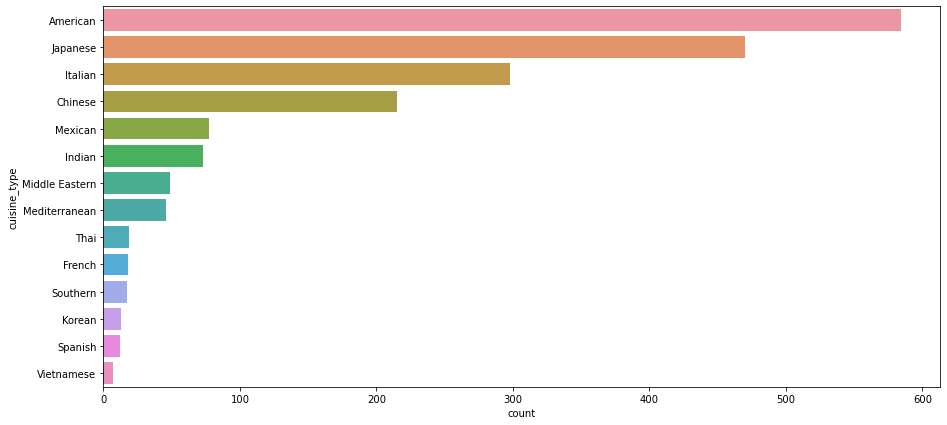

In [18]:
# ordered barplot showing the count of orders for each cuisine type
plt.figure(figsize=(15, 7)) # To resize the plot
sns.countplot( y='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)
plt.show()

#### Observations:

The barplot shows that the American cuisine is the most ordered type followed by Japanese cuisine, with Vietnamese cuisine being the least ordered cuisine

### Count plot of cuisine_type by day_of_week

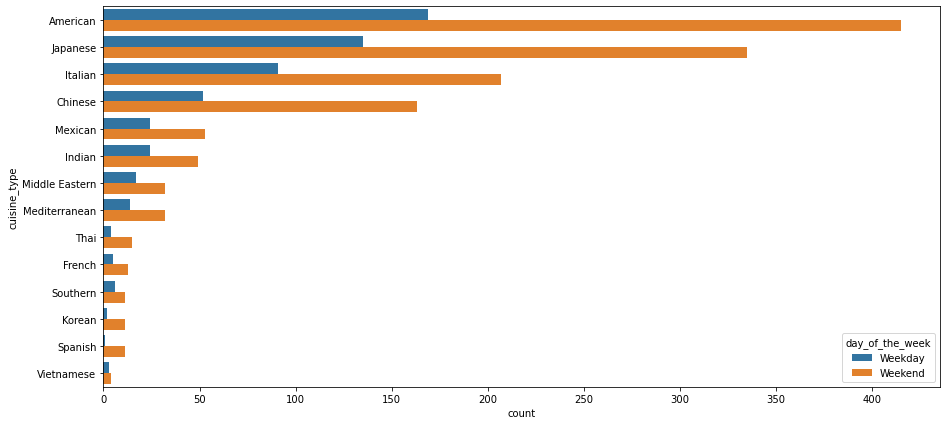

In [19]:
# ordered barplot showing the count of orders for each cuisine type by day of week
plt.figure(figsize=(15, 7)) # To resize the plot
sns.countplot( y='cuisine_type', data=df,  hue='day_of_the_week', order=df['cuisine_type'].value_counts().index)
plt.show()

#### Observations:
1. The barplot shows that the weekend orders are significantly more than weekday orders with the exception of Vietnamese cuisine, in which case, the weekend orders are slighlty more than weekday orders. 
2. The count of orders for each cuisine type still follow the same trend regardless of the day of week

### Count plot of cuisine_type by rating_status

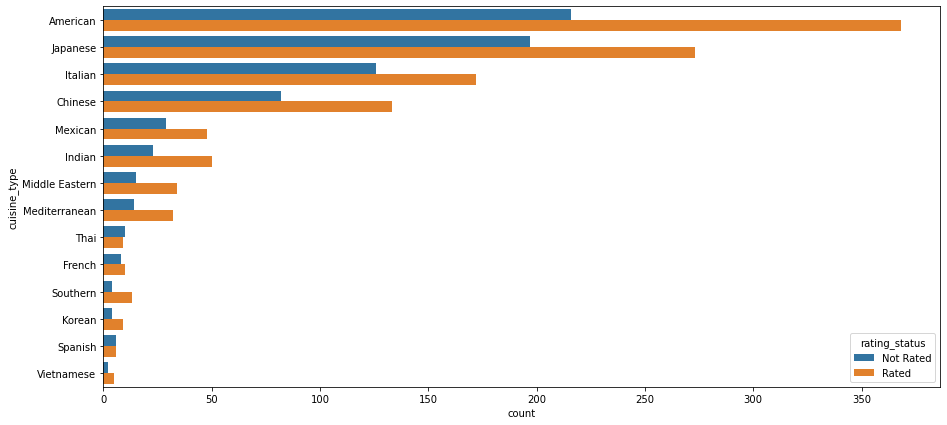

In [20]:
# Make a copy of the original data
df2 = df.copy()

df2['rating_status'] = df2['rating'].apply(lambda x: 'Not Rated' if x in 'Not given' else 'Rated')


# ordered barplot showing the count of orders for each cuisine type by rating_status
plt.figure(figsize=(15, 7)) # To resize the plot
sns.countplot( y='cuisine_type', data=df2, hue='rating_status' ,order=df2['cuisine_type'].value_counts().index)
plt.show()

#### Observations:
1. The barplot shows that for several cuisine type orders, about half are not rated by customers and in the case of Thai and French cusines, the 'Not rated' orders are as much as the rated orders

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# get counts for each restaurant in descending order and retain the top 5
df.restaurant_name.value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The Shake Shack restaurant received the most number of orders, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm, with a total of 216, 132, 119, 96 and 68 orders respectively


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# filter data to weekend orders and get counts for each cuisine type in descending order
df[(df.day_of_the_week == 'Weekend')]['cuisine_type'].value_counts().sort_values(ascending=False).head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
The American cuisine is the most popular cuisine on weekends with 415 total orders on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# Write the code here
over = df[(df.cost_of_the_order > 20.0)].count()[0] # count of orders that cost more than 20 dollars
total = df.count()[0] # count of total orders
over/total*100   # calculate percentage

29.24130663856691

#### Observations:
29.2% of the orders cost more than 20 dollars. This means almost a third of the orders cost more than $20.00

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# mean of delivery time
df.delivery_time.mean()

24.161749209694417

#### Observations:
It takes an average of 24.16 minutes to deliver an order

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
df.customer_id.value_counts().sort_values(ascending=False).head(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
The best customer placed a total of 13 orders which is less than 1% of the entire orders 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Multivariate pair plot of continuous variables

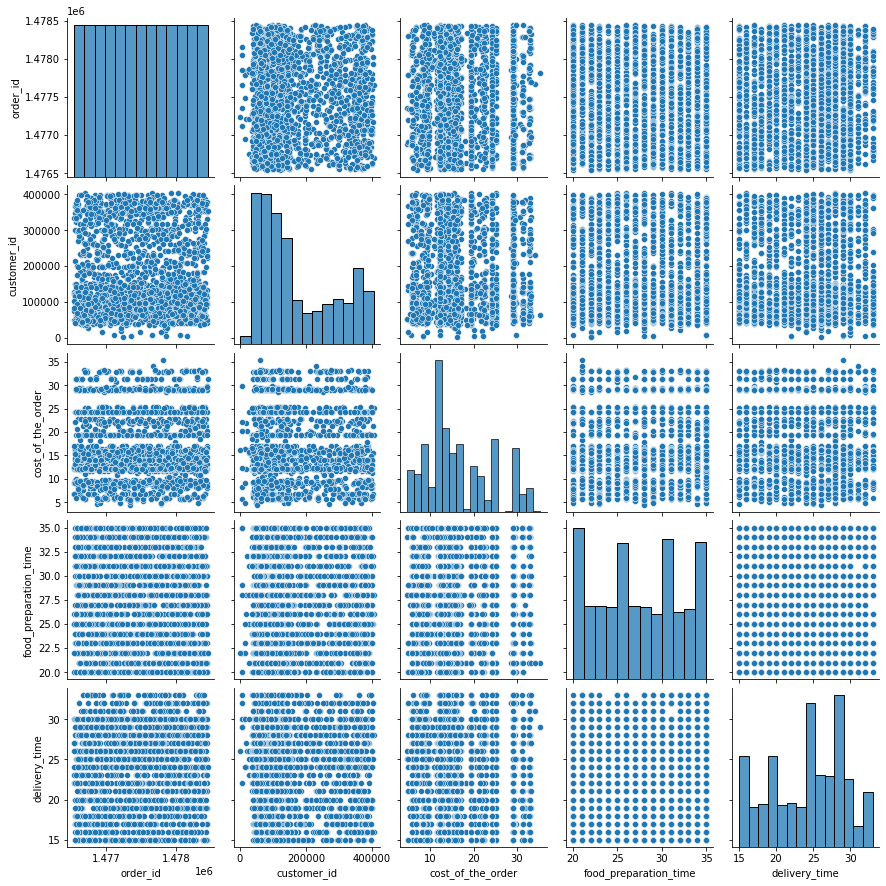

In [26]:
sns.pairplot(data=df)
plt.show()

#### Observations:
The pairplots do not give any clear insights regarding the correlations between the numerical variables

### Correlation heatmap of continuous variables

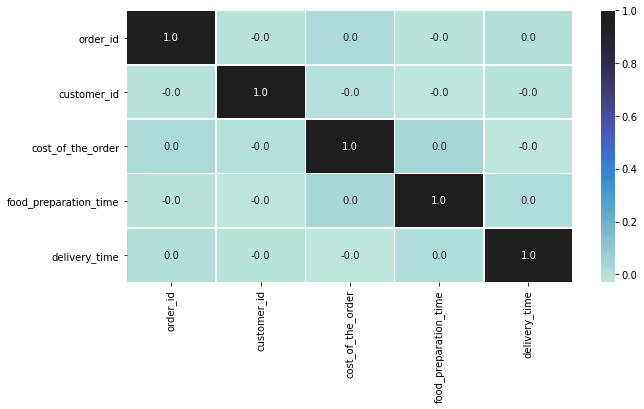

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

#### Observations:
The correlation heatmap confirms no correlations between numerical variables

### Variation of average cost of order with cuisine type

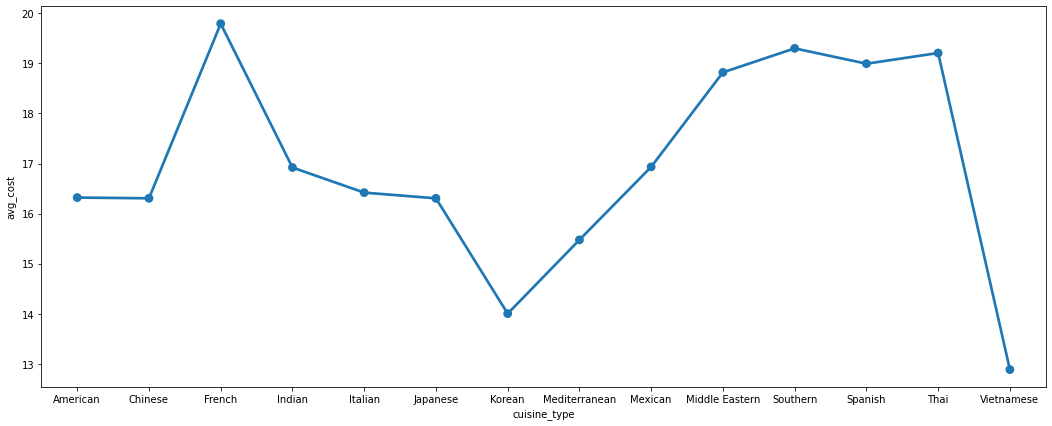

In [28]:
plt.figure(figsize=(18, 7)) # To resize the plot

# create dataset of avg cost, avg prep time and avg delivery time by cuisine type
sns.pointplot(data=df.groupby('cuisine_type').agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean'),
                              avg_prep_time=pd.NamedAgg(column='food_preparation_time',aggfunc='mean'),
                              avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index(), 
              x='cuisine_type',
              y='avg_cost') # plot for avg cost only
plt.show()

#### Observations:
On average, the French cuisine is the most expensive cuisie while the Vietnamese cuisine is the least expensive. The Mediterranean, Southern, Spanish and Thai cuisines are also on the high end of cost.

### Variation of average cost of order with cuisine type and day of the week

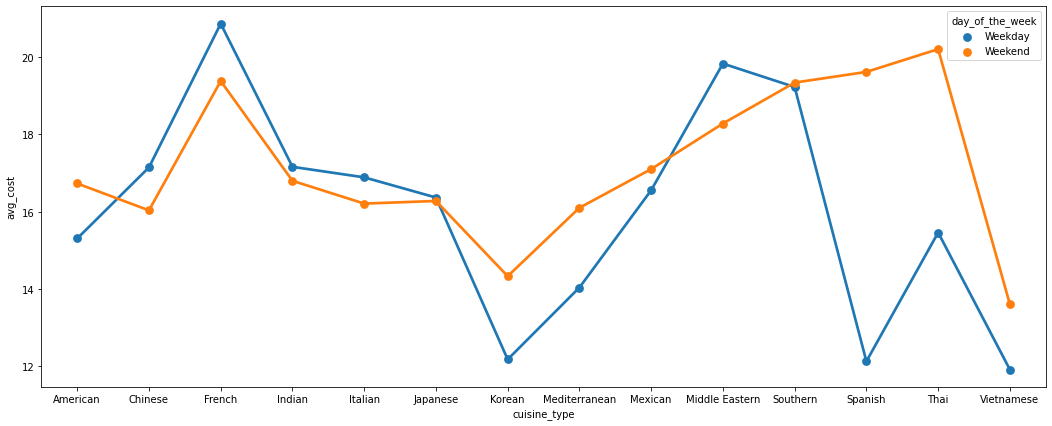

In [29]:
plt.figure(figsize=(18, 7)) # To resize the plot

# create dataset of avg cost, avg prep time and avg delivery time by cuisine type and day of week
sns.pointplot(data=df.groupby(['cuisine_type','day_of_the_week']).agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean'),
                              avg_prep_time=pd.NamedAgg(column='food_preparation_time',aggfunc='mean'),
                              avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index(), 
              x='cuisine_type',
              y='avg_cost',
              hue = 'day_of_the_week') # plot for avg cost and day of week
plt.show()

#### Observations:
The average cost of an order is not so different for most cuisines on both weekdays and weekends except for Spanish and Thai cuisines which become almost double the cost on weekends.

### Variation of average order preparation time with cuisine type

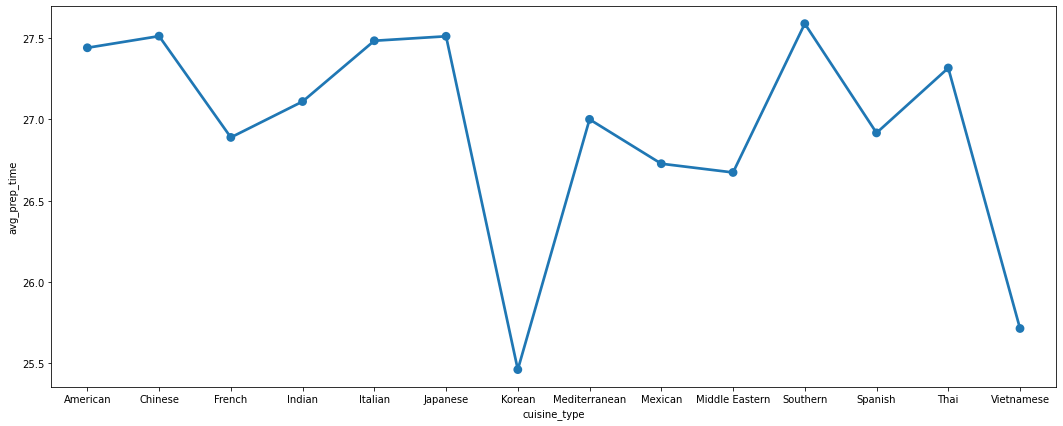

In [30]:
plt.figure(figsize=(18, 7)) # To resize the plot

# create dataset of avg cost, avg prep time and avg delivery time by cuisine type
sns.pointplot(data=df.groupby('cuisine_type').agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean'),
                              avg_prep_time=pd.NamedAgg(column='food_preparation_time',aggfunc='mean'),
                              avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index(), 
              x='cuisine_type',
              y='avg_prep_time') # plot for avg prep time
plt.show()

#### Observations:
The average time spent to prepare an order is least for Korean cuisine and highest for Southern cuisine

### Variation of average order preparation time with cuisine type and day of the week

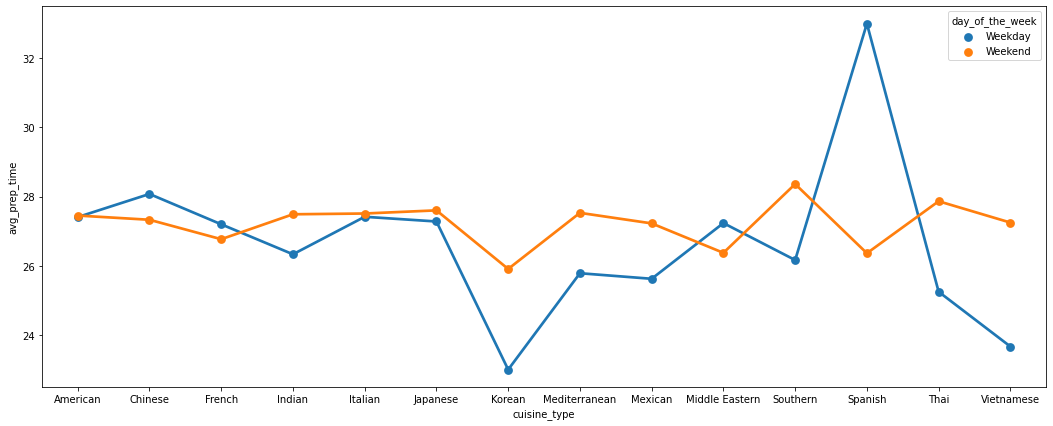

In [31]:
plt.figure(figsize=(18, 7)) # To resize the plot

# create dataset of avg cost, avg prep time and avg delivery time by cuisine type and day of week
sns.pointplot(data=df.groupby(['cuisine_type','day_of_the_week']).agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean'),
                              avg_prep_time=pd.NamedAgg(column='food_preparation_time',aggfunc='mean'),
                              avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index(), 
              x='cuisine_type',
              y='avg_prep_time',
              hue = 'day_of_the_week') # plot for avg prep time and day of week
plt.show()

#### Observations:
The average time spent to prepare an order on a weekend is similar across all cuisines.

For a Southern cuisine, the average time spent to prepare an order is significantly less on weekends compared to weekdays while the opposite is the case for Korean cuisine

### Variation of average order delivery time with cuisine type

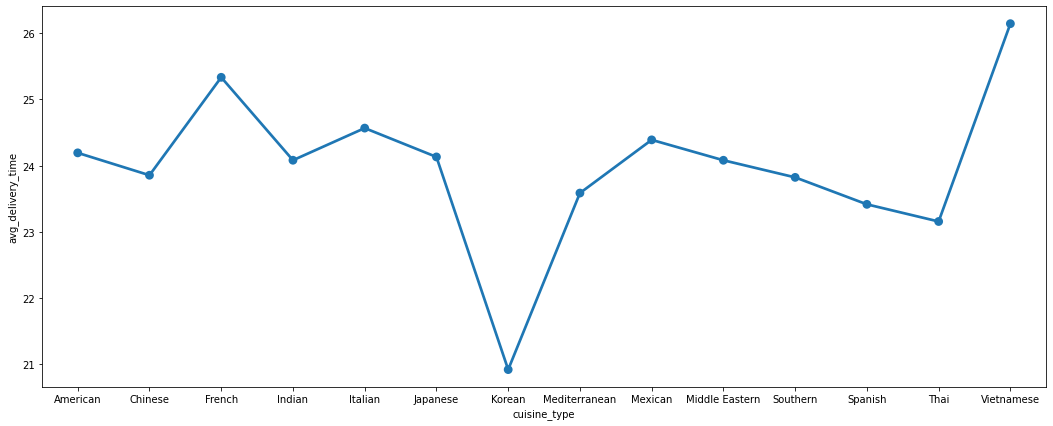

In [32]:
plt.figure(figsize=(18, 7)) # To resize the plot

# create dataset of avg cost, avg prep time and avg delivery time by cuisine type
sns.pointplot(data=df.groupby('cuisine_type').agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean'),
                              avg_prep_time=pd.NamedAgg(column='food_preparation_time',aggfunc='mean'),
                              avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index(), 
              x='cuisine_type',
              y='avg_delivery_time') # plot for avg delivery time
plt.show()

#### Observations:
The average time spent to deliver an order is least for Korean cuisine and highest for Vietnamese cuisine

### Variation of average order delivery time with cuisine type and day of the week

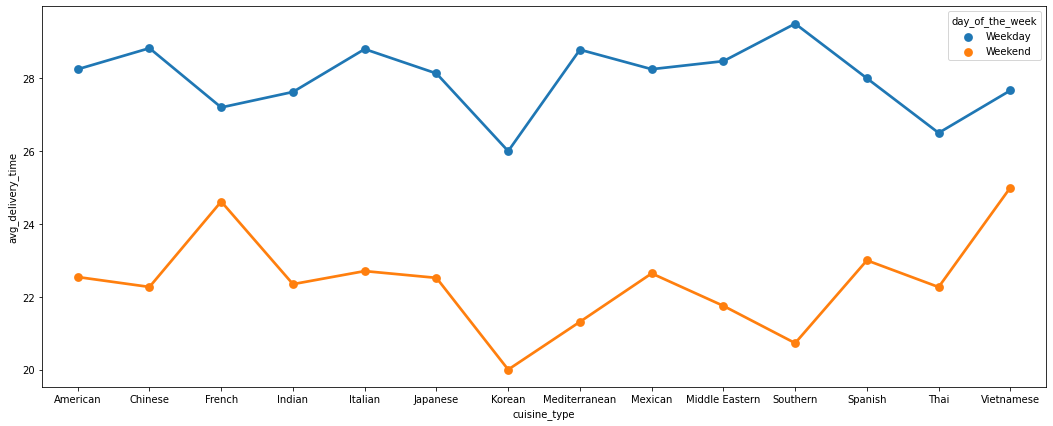

In [33]:
plt.figure(figsize=(18, 7)) # To resize the plot

# use dataset of avg cost, avg prep time and avg delivery time by cuisine type and day of week
sns.pointplot(data=df.groupby(['cuisine_type','day_of_the_week']).agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean'),
                              avg_prep_time=pd.NamedAgg(column='food_preparation_time',aggfunc='mean'),
                              avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index(), 
              x='cuisine_type',
              y='avg_delivery_time',
              hue = 'day_of_the_week') # plot for avg delivery time and day of week
plt.show()

#### Observations:
The average time spent to deliver an order is lower on weekneds compared to weekdays

### Variation of rating with average cost of order for every cuisine type

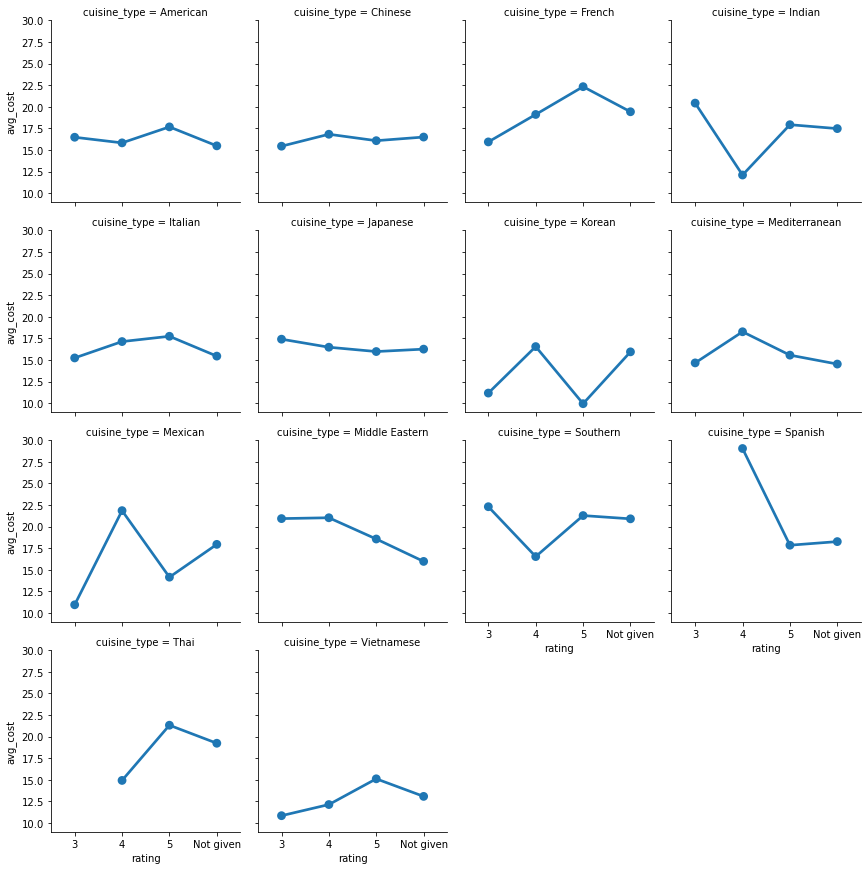

In [34]:
# create dataset of avg cost by cuisine type and rating
sns.catplot( data=df.groupby(['rating','cuisine_type']).agg(avg_cost=pd.NamedAgg(column='cost_of_the_order',aggfunc='mean')).reset_index()
            ,x='rating', y='avg_cost', 
                 col='cuisine_type', kind="point",
                height=3,col_wrap = 4) # plot rating by cost for each cuisine type with 4 plots on each row 
plt.show()

#### Observations:
For the French, Vietnamese, Italian and Thai cuisines, it appears that the rating incrases for more expensive orders while the converse appears to be the case for orders from the Middle Eastern and Spanish cuisines


### Variation of rating with delivery time for every cuisine type

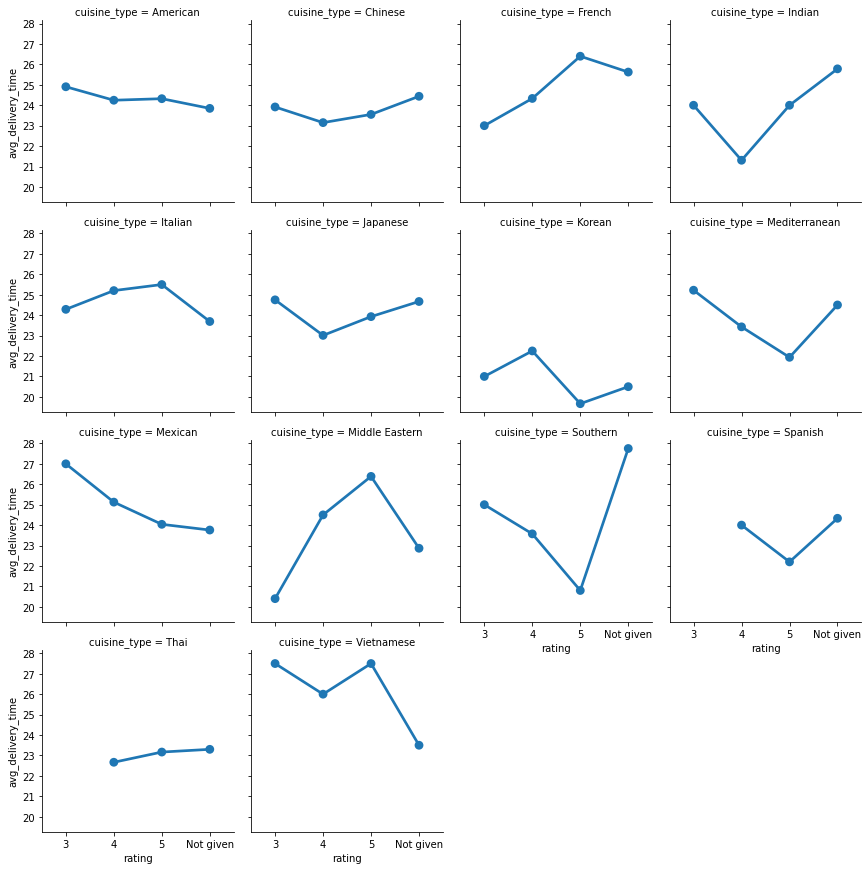

In [35]:
# create dataset of avg cost by cuisine type and rating
sns.catplot( data=df.groupby(['rating','cuisine_type']).agg(avg_delivery_time=pd.NamedAgg(column='delivery_time',aggfunc='mean')).reset_index()
            ,x='rating', y='avg_delivery_time', 
                 col='cuisine_type', kind="point",
                height=3,col_wrap = 4) # plot rating by cost for each cuisine type with 4 plots on each row 
plt.show()

#### Observations:
For the American, Mexican, Spanish, Mediterranean and Southern cuisines, it appears that the orders are rated high for faster deliveries

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [36]:
# create a new data frame keeping only orders with a valid rating
dfrating = df[(df['rating'] != 'Not given')] 

 # change datatype of rating colmun to integer to enable aggregations
dfrating['rating']=dfrating['rating'].astype('int') 

# calculate average rating and count of rating by restaurant name and store in new dataframe
new_df = dfrating.groupby('restaurant_name').agg(avg_rating = pd.NamedAgg(column='rating',aggfunc='mean'), 
                                        rating_count = pd.NamedAgg(column='rating',aggfunc='count')).reset_index()

# filter new data frame to restaurants with average rating more than 4 and rating counts over 50
new_df[(new_df['avg_rating'] > 4) & (new_df['rating_count'] > 50)]

,restaurant_name,avg_rating,rating_count
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations:
 
There are four restaurants with over 50 rating counts and have an average rating above 4


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
# add column to df2 to calculate revenue
# The question is unclear on where to cut off the 15% charge on orders that cost over $5
# Assumption is made to apply the 15% charge to orders that cost more than $5 but lower or equal to $20
# charge value is not provided for orders that cost lower than $5, hence no revenue is calculated
df2.loc[df2['cost_of_the_order'] > 20, 'Revenue' ] = df2['cost_of_the_order'] * 0.25
df2.loc[(df2['cost_of_the_order'] > 5) & (df2['cost_of_the_order'] <= 20),'Revenue'] = df2['cost_of_the_order'] * 0.15

# Total revenue across all orders
df2['Revenue'].sum()  

6166.303

#### Observations:
Total revenue of $6166.30 is generated across orders based on charges applied.

Charge value is not provided for orders that cost lower than $5.00, hence no revenue is calculated for those orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:

# add a new column 'Total_time' to the modifed df2 dataframe get the total time it takes 
df2['Total_time'] = df2['food_preparation_time'] + df2['delivery_time']

# calculate the percentage of orders with total time greater than 60 minutes
df2[df2['Total_time']>60].count()[0]/df2.count()[0]*100

10.537407797681771

#### Observations:
10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [39]:
# compute average delivery_time by day_of_week
df.groupby('day_of_the_week').agg(avg_delivery_time = pd.NamedAgg(column='delivery_time', aggfunc='mean'))

,avg_delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


## Observations:
On average, orders get delivered about 20% faster on weekends than on weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

1. The company should feature more products from the American, Japanese, Italian and Chinese cuisines

2. Since it appears that the orders are rated high for faster deliveries looking at the American, Mexican, Spanish, Mediterranean and Southern cuisines, the company should consider introducing extra incentives to delivery drivers if order is delivered faster. 

3. Based on the high number of orders not rated which is approximately 40%, the company should consider incentifying the custoomers who give ratings maybe through a discount on their next order. More ratings will help give better performance evaluation and attract more customers